In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Importing the dataset
df=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Projects\titanic_train.csv')

In [6]:

# Shape
df.shape

(891, 12)

In [7]:
# Previewing the data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:

# Listing down the columns
df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [11]:

# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [16]:
# Imputing missing values for age
# Strategy - mean

df['Age'] = df['Age'].fillna(df['Age'].mean())



In [17]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'] = df['Embarked'].fillna('S')



In [14]:
# Want to check one more thing

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [15]:

df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [18]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [20]:
# Five point summary
df.describe()


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62 people died in the accident


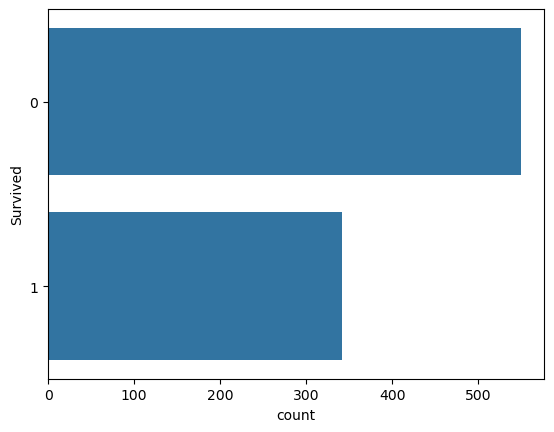

In [21]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

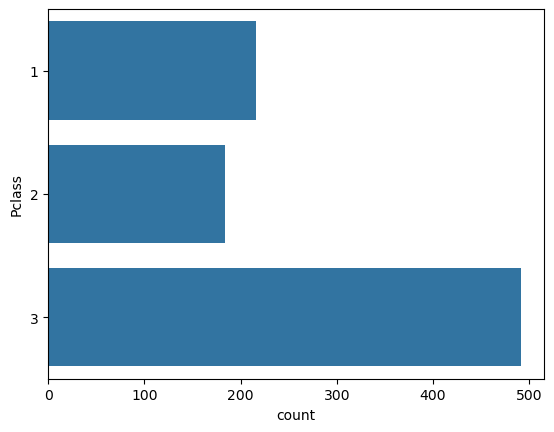

In [22]:

# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

# Conclusion : Pclass was the most crowded class


Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Sex'>

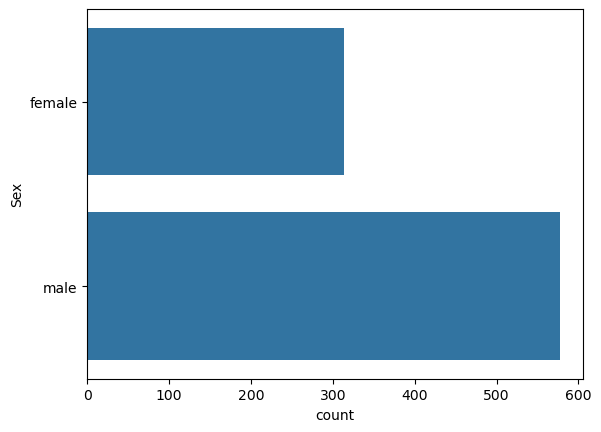

In [23]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(df['Sex'])

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: ylabel='count'>

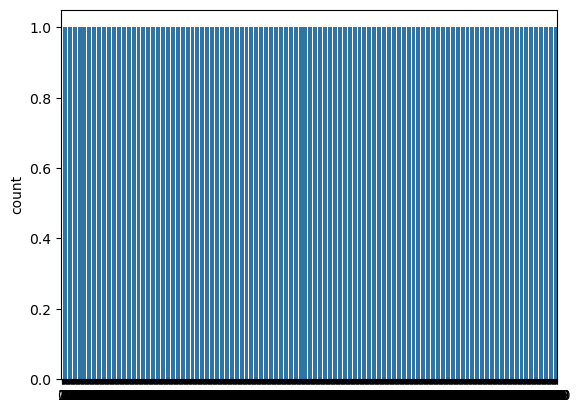

In [24]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: ylabel='count'>

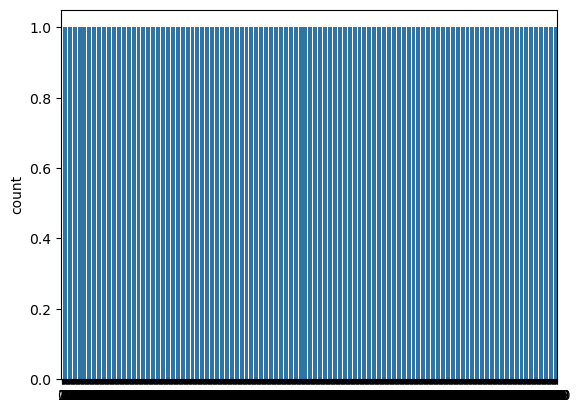

In [25]:

print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

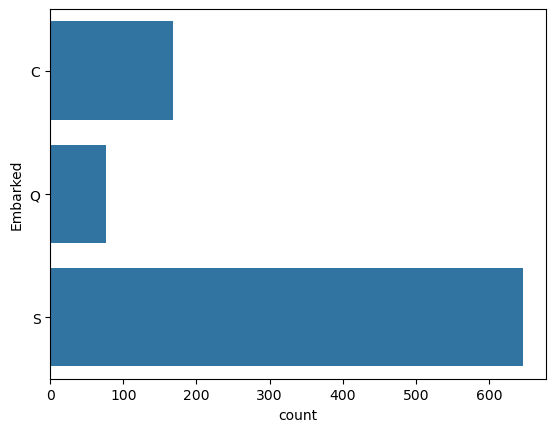

In [26]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

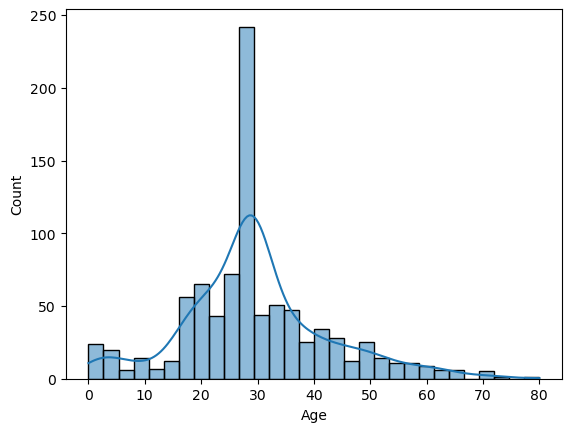

In [36]:


sns.histplot(df['Age'], kde=True)  
plt.show()


<Axes: ylabel='Age'>

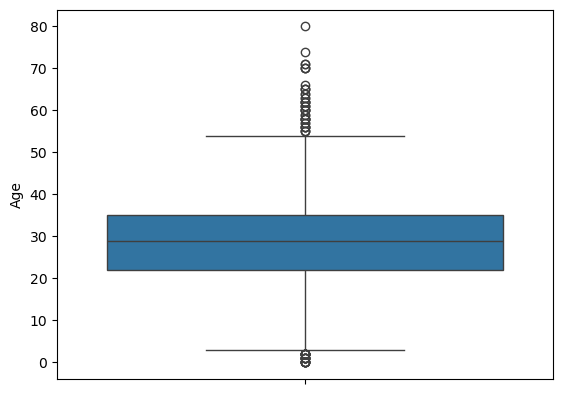

In [28]:

sns.boxplot(df['Age'])

Conclusion
1. For all practical purposes age can be cosidered as normal distribution
2. Deeper analysis is required for outlier detection

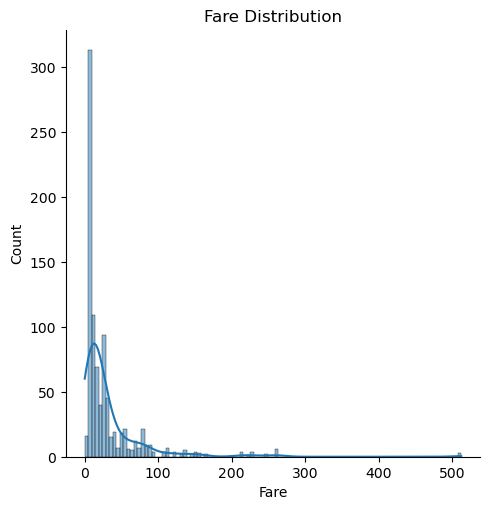

In [37]:
# Fare column

sns.displot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


In [31]:

print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: ylabel='Fare'>

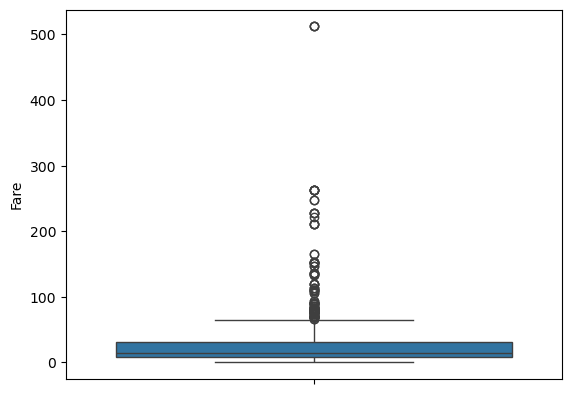

In [32]:
sns.boxplot(df['Fare'])

In [33]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])


People with fare in between $200 and $300 17
People with fare in greater than $300 3


Conclusion
1. Highly skewed data, a lot of people had cheaper tickets
2. Outliers are there in the data

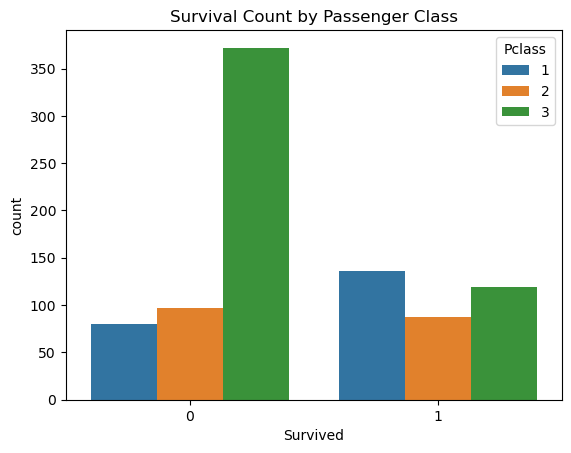

In [38]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()



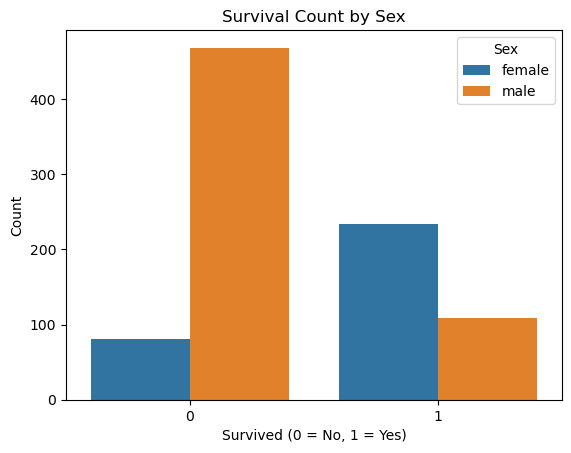

In [40]:
# Survival with Sex



sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


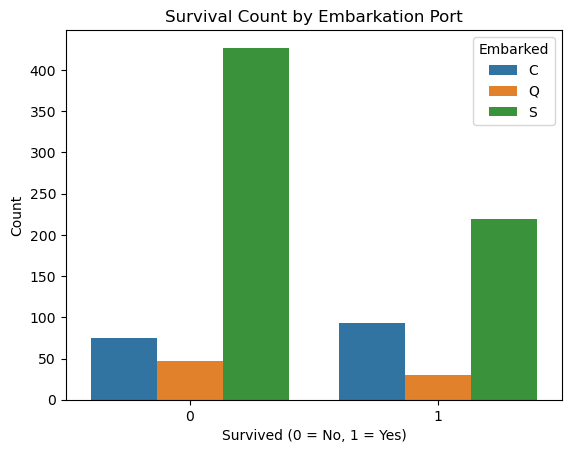

In [42]:
# Survival with Embarked



sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


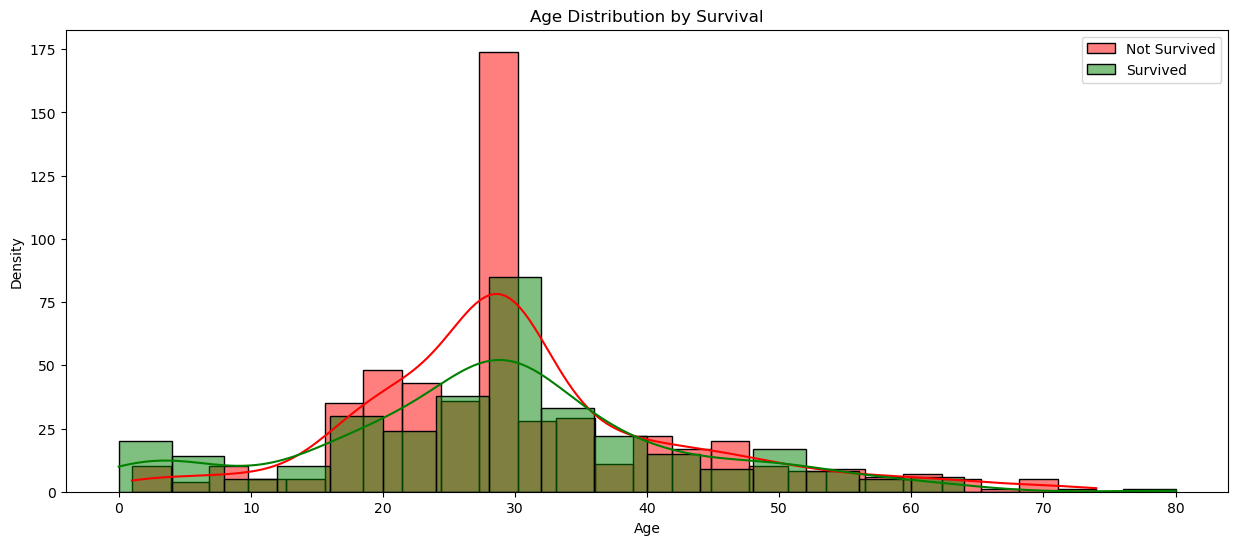

In [44]:

# Survived with Age



plt.figure(figsize=(15, 6))

# Plotting the Age distribution for those who did not survive (Survived == 0)
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')

# Plotting the Age distribution for those who survived (Survived == 1)
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')

# Adding labels and title
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()


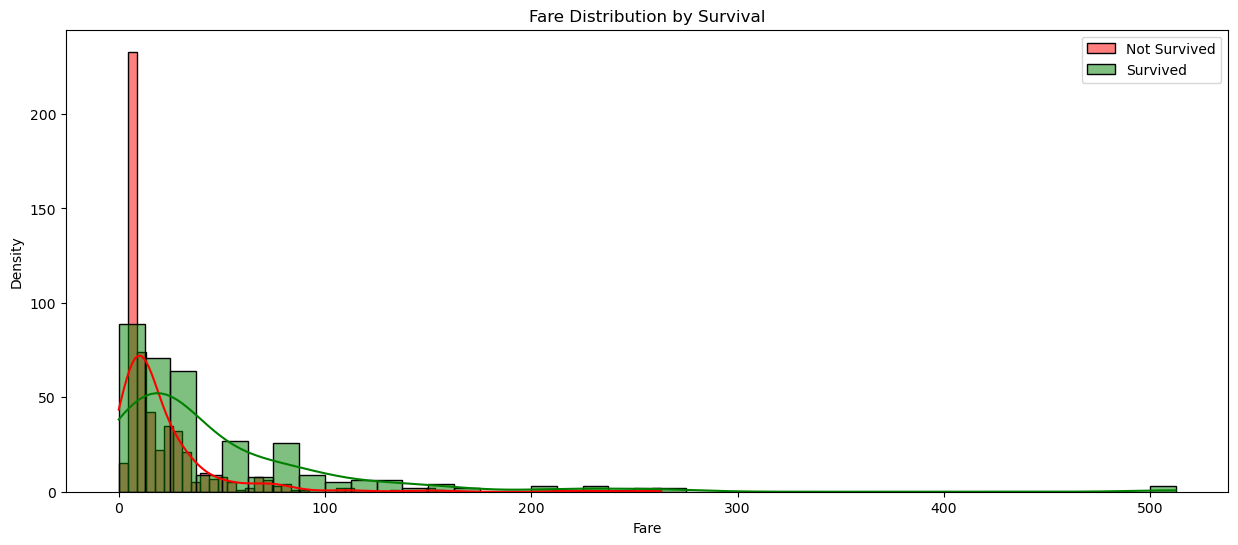

In [46]:
# Survived with Fare



plt.figure(figsize=(15, 6))

# Plotting the Fare distribution for those who did not survive (Survived == 0)
sns.histplot(df[df['Survived'] == 0]['Fare'], kde=True, color='red', label='Not Survived')

# Plotting the Fare distribution for those who survived (Survived == 1)
sns.histplot(df[df['Survived'] == 1]['Fare'], kde=True, color='green', label='Survived')

# Adding labels and title
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()

plt.show()



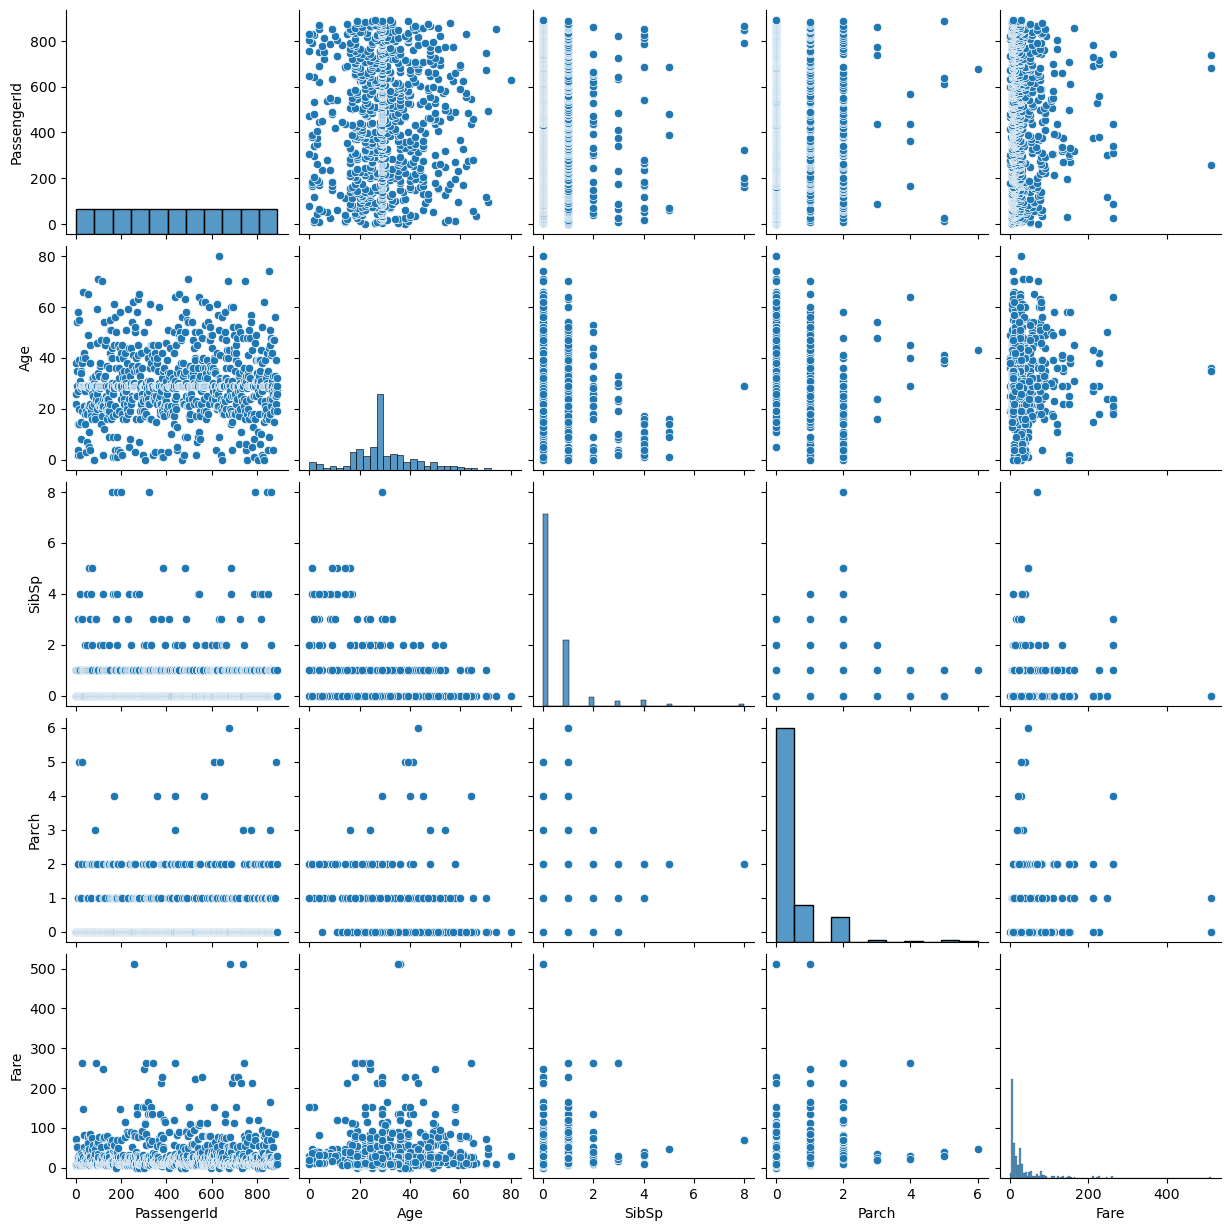

In [47]:
sns.pairplot(df)

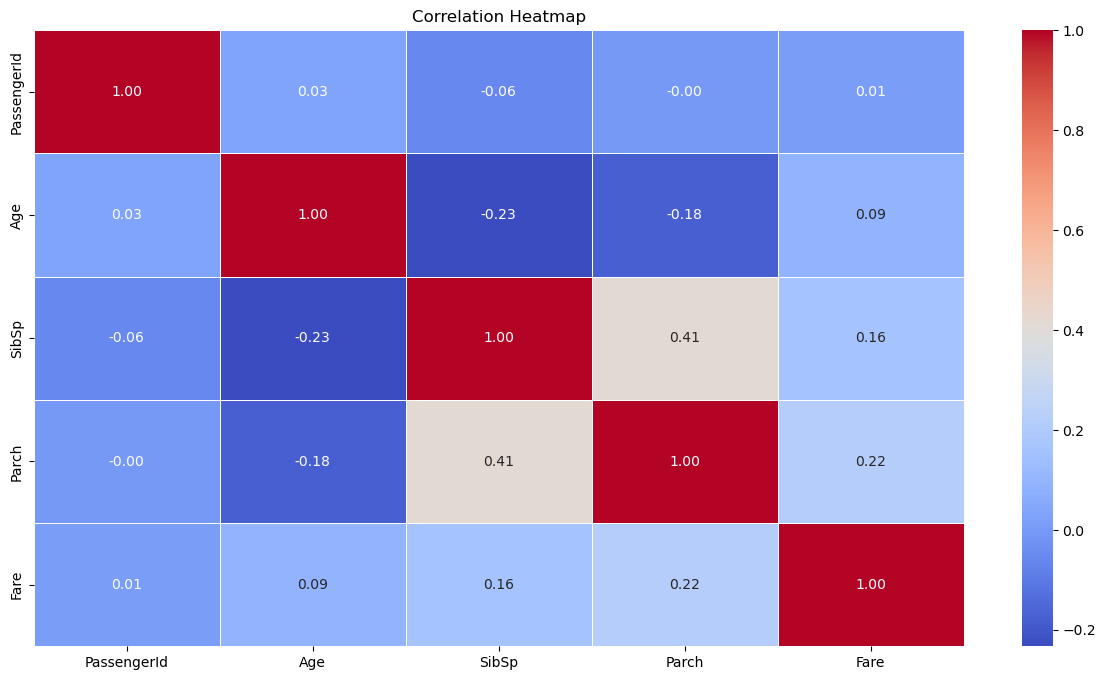

In [ ]:

numeric_df = df.select_dtypes(include=['number'])


corr = numeric_df.corr()


plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)


plt.title('Correlation Heatmap')
plt.show()


In [52]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']


In [49]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,C
114,115,0,3,"Attalah, Miss. Malake",female,17,0,0,2627,14.4583,C
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30,0,0,364516,12.4750,S
738,739,0,3,"Ivanoff, Mr. Kanio",male,29,0,0,349201,7.8958,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22,1,1,248738,29.0000,S


In [53]:

# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"


In [54]:
df['family_type']=df['family_size'].apply(family_type)

In [55]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
753,754,0,3,"Jonkoff, Mr. Lalio",male,23,0,0,349204,7.8958,S,0,Alone
293,294,0,3,"Haas, Miss. Aloisia",female,24,0,0,349236,8.8500,S,0,Alone
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,29,0,2,2678,15.2458,C,2,Medium
135,136,0,2,"Richard, Mr. Emile",male,23,0,0,SC/PARIS 2133,15.0458,C,0,Alone
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25,0,0,C.A. 29178,13.0000,S,0,Alone


In [56]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [57]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30,234818,12.3500,Q,Alone
744,745,1,3,"Stranden, Mr. Juho",male,31,STON/O 2. 3101288,7.9250,S,Alone
29,30,0,3,"Todoroff, Mr. Lalio",male,29,349216,7.8958,S,Alone
108,109,0,3,"Rekic, Mr. Tido",male,38,349249,7.8958,S,Alone
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,LINE,0.0000,S,Alone


In [58]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [59]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape



(884, 10)

In [60]:

# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]


In [61]:


df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)


,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [62]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)


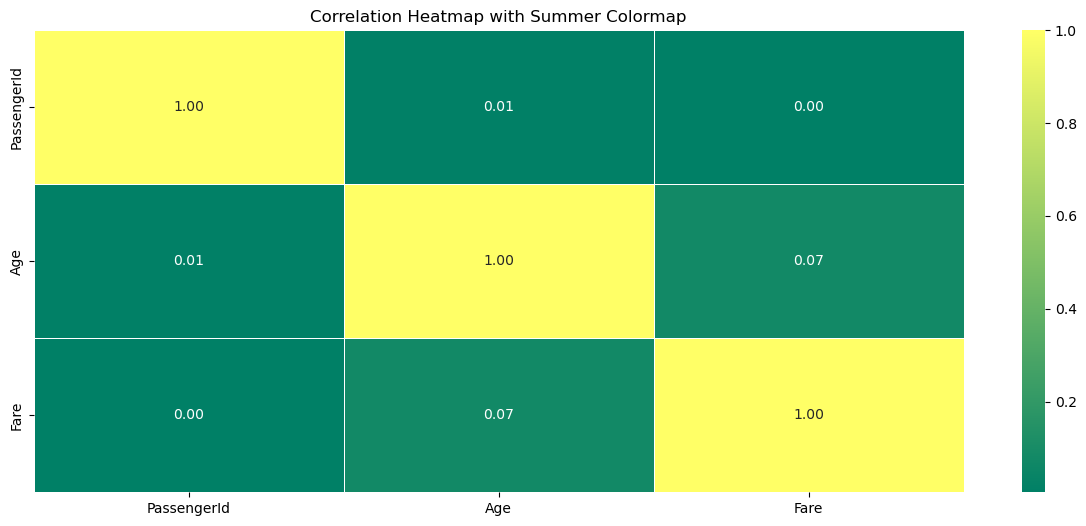

In [64]:

numeric_df = df.select_dtypes(include=['number'])


corr = numeric_df.corr()


plt.figure(figsize=(15, 6))
sns.heatmap(corr, cmap='summer', annot=True, fmt='.2f', cbar=True, linewidths=0.5)


plt.title('Correlation Heatmap with Summer Colormap')
plt.show()



Drawing Conclusions
1. Chance of female survival is higher than male survival
2. Travelling in Pclass 3 was deadliest
3. Somehow, people going to C survived more
4. People in the age range of 20 to 40 had a higher chance of not surviving
5. People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone